In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import preprocessing

In [0]:
df=pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


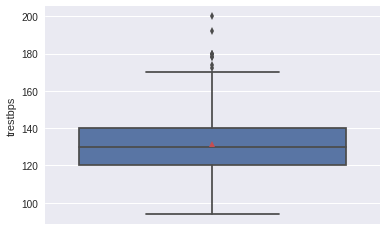

In [0]:
sns.boxplot('trestbps',data=df,showmeans=True,orient='v')


In [0]:

from scipy.stats import zscore
z_score = abs(zscore(df.trestbps))
print(z_score)

[0.76395577 0.09273778 0.09273778 0.66386682 0.66386682 0.47839125
 0.47839125 0.66386682 2.30600417 1.04952029 0.47839125 0.09273778
 0.09273778 1.23499586 1.04952029 0.66386682 0.66386682 1.04952029
 1.04952029 0.47839125 0.19282673 0.09273778 0.47839125 1.04952029
 0.47839125 1.62064933 1.04952029 1.23499586 0.47839125 0.09273778
 1.52056038 0.66386682 0.09273778 0.3783023  0.3783023  0.59261706
 0.19282673 1.04952029 1.33508481 1.62064933 0.47839125 0.09273778
 1.57767328 0.09273778 0.47839125 0.66386682 0.47839125 0.36416545
 0.20696359 0.36416545 0.09273778 0.66386682 0.09273778 1.34922166
 0.19282673 0.13571383 0.54964101 0.94943134 0.77809263 0.20696359
 1.23499586 1.34922166 0.77809263 0.19282673 0.47839125 0.36416545
 1.80612489 0.09273778 0.66386682 0.43541521 0.66386682 2.14880232
 0.09273778 0.47839125 0.54964101 0.19282673 0.3783023  0.47839125
 0.20696359 1.52056038 1.12077005 0.20696359 1.69189909 1.1637461
 1.69189909 0.94943134 0.77809263 1.74901199 1.23499586 1.80612

In [0]:
print(z_score>3)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [0]:


df[df.trestbps>170]





,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [0]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]





,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


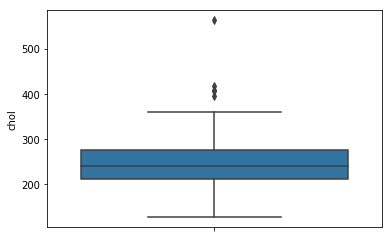

In [0]:
sns.boxplot('chol',data=df,orient='v')

In [0]:
from scipy.stats import zscore
z_score = abs(zscore(df.chol))
print(z_score)

[2.56333707e-01 7.21994916e-02 8.16772694e-01 1.98357261e-01
 2.08204965e+00 1.04867848e+00 9.22520713e-01 3.23430762e-01
 9.13400106e-01 1.51249006e+00 1.40380814e-01 5.55336549e-01
 3.81407208e-01 6.81494318e-01 7.09940408e-01 5.26890460e-01
 1.81149290e+00 3.91612084e-01 1.42230447e-02 1.40380814e-01
 2.37008225e-01 2.56333707e-01 3.91612084e-01 6.30788845e-02
 9.13400106e-01 1.07712457e+00 6.62168836e-01 1.37721168e+00
 3.29955504e+00 9.52051070e-01 9.32725588e-01 1.33856072e+00
 5.26890460e-01 5.16685585e-01 6.42843353e-01 1.33856072e+00
 1.11577554e+00 2.75659190e-01 4.39383655e-01 2.19800254e+00
 1.19307747e+00 2.44279199e-02 7.39470765e-01 3.42756244e-01
 1.44430873e+00 1.52161066e+00 2.17682743e-01 2.07477868e-01
 5.84866907e-01 2.37008225e-01 1.88152385e-01 1.07712457e+00
 2.94984672e-01 2.03427808e+00 1.10850456e-01 8.74749141e-01
 4.68914013e-01 2.65454315e-01 1.24193330e+00 1.09645005e+00
 3.62081726e-01 1.21240295e+00 1.16463138e+00 8.36098177e-01
 6.81494318e-01 1.222607

In [0]:

print(z_score>3)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [0]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]





















,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [0]:
from scipy.stats import zscore
z_score = abs(zscore(df.chol))
print(z_score)

[2.56333707e-01 7.21994916e-02 8.16772694e-01 1.98357261e-01
 2.08204965e+00 1.04867848e+00 9.22520713e-01 3.23430762e-01
 9.13400106e-01 1.51249006e+00 1.40380814e-01 5.55336549e-01
 3.81407208e-01 6.81494318e-01 7.09940408e-01 5.26890460e-01
 1.81149290e+00 3.91612084e-01 1.42230447e-02 1.40380814e-01
 2.37008225e-01 2.56333707e-01 3.91612084e-01 6.30788845e-02
 9.13400106e-01 1.07712457e+00 6.62168836e-01 1.37721168e+00
 3.29955504e+00 9.52051070e-01 9.32725588e-01 1.33856072e+00
 5.26890460e-01 5.16685585e-01 6.42843353e-01 1.33856072e+00
 1.11577554e+00 2.75659190e-01 4.39383655e-01 2.19800254e+00
 1.19307747e+00 2.44279199e-02 7.39470765e-01 3.42756244e-01
 1.44430873e+00 1.52161066e+00 2.17682743e-01 2.07477868e-01
 5.84866907e-01 2.37008225e-01 1.88152385e-01 1.07712457e+00
 2.94984672e-01 2.03427808e+00 1.10850456e-01 8.74749141e-01
 4.68914013e-01 2.65454315e-01 1.24193330e+00 1.09645005e+00
 3.62081726e-01 1.21240295e+00 1.16463138e+00 8.36098177e-01
 6.81494318e-01 1.222607

In [0]:
print(z_score>3)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [0]:

from scipy import stats
df1=df[(np.abs(stats.zscore(df))<3).all(axis=1)]


In [0]:

df1.shape

(287, 14)

In [0]:
df1.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [0]:


x=df1.drop('target',axis='columns')

In [0]:
y=df1.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [0]:
len(x_train)


143

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.svm import SVC
model=SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1,0.8,0.9, 1, 10,11, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid)
 
# Train the classifier
clf_grid.fit(x_train, y_train)
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters:
 {'C': 11, 'gamma': 0.01}
Best Estimators:
 SVC(C=11, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:

model.fit(x_train,y_train)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
model.score(x_test,y_test)

0.8680555555555556

In [0]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[49, 17],
       [ 2, 76]])

Text(33.0, 0.5, 'truth')

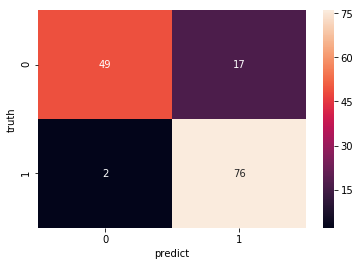

In [0]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')

In [0]:
y_predict = model.predict(x_test)
probs= model.predict_proba(x_test)[:,1]


In [0]:
tpr=cm[0,0]/(cm[0,0]+cm[1,0])
fpr=cm[1,1]/(cm[1,1]+cm[1,0])

 

In [0]:
tpr

0.9607843137254902

In [0]:
fpr

0.9743589743589743

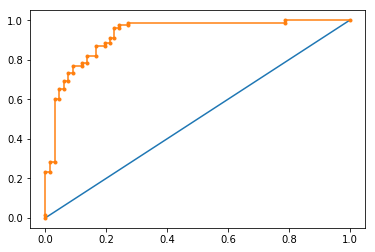

In [0]:
from matplotlib import pyplot
fpr,tpr,thresholds=roc_curve(y_test,probs)
pyplot.plot([0,1],[0,1],linestyle='-')
pyplot.plot(fpr,tpr,marker='.')
pyplot.show()

In [0]:
roc_auc_score(y_test,probs)

0.9267676767676768